# 1. Exploratory data analysis

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn

       YearsExperience        Salary
count        50.000000      50.00000
mean          9.480000   77370.54740
std           5.485491   28298.92442
min           1.400000   33048.80000
25%           4.500000   53861.88000
50%           9.300000   78598.65000
75%          13.350000   95356.22500
max          19.400000  140646.44000

Mean:
 YearsExperience        9.4800
Salary             77370.5474
Name: mean, dtype: float64

Median:
 YearsExperience        9.30
Salary             78598.65
Name: 50%, dtype: float64

Variance:
 YearsExperience    3.009061e+01
Salary             8.008291e+08
Name: std, dtype: float64


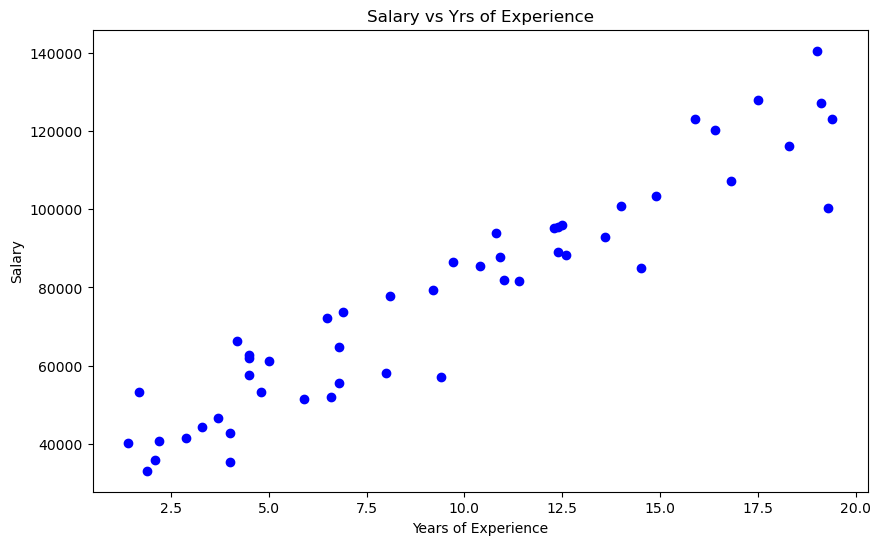

In [2]:
data = pd.read_csv("extended_salary_data.csv")
salary = data['Salary']
years = data['YearsExperience']
plt.figure(figsize=(10,6))
plt.scatter(years, salary, color='blue')
plt.title('Salary vs Yrs of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
print(data.describe())
print("\nMean:\n",data.describe().loc['mean',:])
print("\nMedian:\n",data.describe().loc['50%',:])
print("\nVariance:\n",data.describe().loc['std',:]**2)

# 2. Build A linear regression model

In [3]:
x = years
y = salary
x = x.values.reshape(-1,1)
y = y.values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [4]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
m = model1.coef_
c = model1.intercept_
print("Slope: ", m[0][0])
print("Intercept: ", c[0])

Slope:  4854.184972065954
Intercept:  31387.44340406063


# 3. Evaluate the model

In [5]:
#get the salary prediction of a person with 10 years of experience
yr = 10
model1.predict([[yr]])

array([[79929.29312472]])

In [6]:
y_pred = model1.predict(X_test)
print("MSE: ",sklearn.metrics.mean_squared_error(y_test, model1.predict(X_test)))
print("MAE: ", sklearn.metrics.mean_absolute_error(y_test, model1.predict(X_test)))
r2 = sklearn.metrics.r2_score(y_test, y_pred)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R^2: ",adjusted_r2)

MSE:  79580620.27310552
MAE:  6836.210895894571
Adjusted R^2:  0.8321396975643076


Text(0, 0.5, 'Salary')

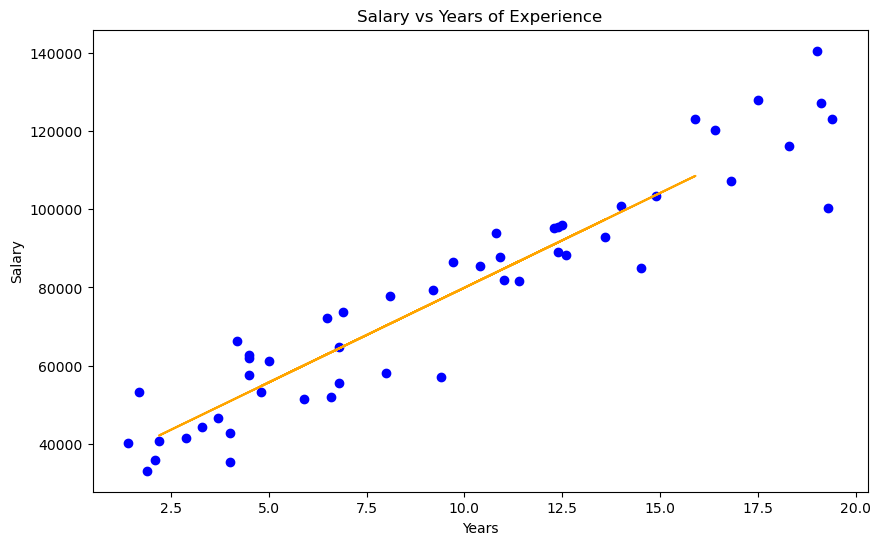

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue')
plt.plot(X_test, y_pred, color='orange')
plt.title('Salary vs Years of Experience')
plt.xlabel('Years')
plt.ylabel('Salary')

# Bonus Task ✍️(◔◡◔)

In [8]:
max_salary=data.loc[:,'Salary'].max()
max_salary

140646.44

In [9]:
 data.loc[:, 'NumProjectsCompleted'] =[ int(i) for i in data.loc[:, 'YearsExperience']*1.2 + (data.loc[:, 'Salary'] / max_salary)*3 +(6*np.random.random((len(data),))-3)]

In [10]:
data.head()

,YearsExperience,Salary,NumProjectsCompleted
0,8.1,77884.67,14
1,19.1,127213.68,27
2,14.9,103343.52,21
3,12.4,88988.96,17
4,4.0,35214.78,5


In [11]:
X = data[['YearsExperience', 'NumProjectsCompleted']]
y = data['Salary']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
m = model2.coef_
c = model2.intercept_
print("Slope: ", m)
print("Intercept: ", c)

Slope:  [4966.38197292  -85.16076481]
Intercept:  31443.054638080408


In [14]:
y_pred = model2.predict(X_test)

In [15]:
print("MSE: ",sklearn.metrics.mean_squared_error(y_test, y_pred))
print("MAE: ", sklearn.metrics.mean_absolute_error(y_test, y_pred))
r2 = sklearn.metrics.r2_score(y_test, y_pred)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R^2: ",adjusted_r2)

MSE:  80496420.95817123
MAE:  6842.806093581738
Adjusted R^2:  0.8059519872241931


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\arnab\AppData\Local\Temp\ipykernel_45520\790005815.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


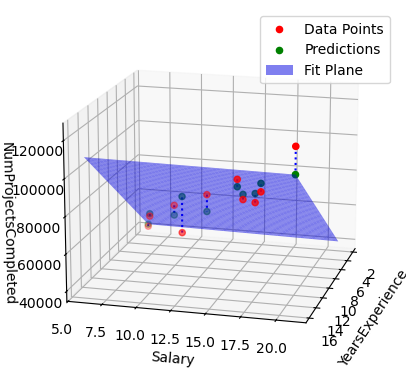

In [16]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel(data.columns[0]) 
ax.set_ylabel(data.columns[1]) 
ax.set_zlabel(data.columns[2])
x_surf, y_surf = np.meshgrid(
    np.linspace(X_test['YearsExperience'].min(), X_test['YearsExperience'].max(), 100),
    np.linspace(X_test['NumProjectsCompleted'].min(), X_test['NumProjectsCompleted'].max(), 100)
)
z_surf = model2.predict(np.array([x_surf.ravel(), y_surf.ravel()]).T)
z_surf = z_surf.reshape(x_surf.shape)
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], y_test, color='red', label='Data Points')
ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], y_pred, color='green', label='Predictions')
for i in range(len(X_test)):
    ax.plot([X_test.iloc[i, 0],X_test.iloc[i, 0]], [X_test.iloc[i, 1],X_test.iloc[i, 1]],[y_test.iloc[i],y_pred[i]], ':b')
ax.plot_surface(x_surf, y_surf, z_surf, color='blue', alpha=0.5, label='Fit Plane')
ax.legend()

ax.view_init(elev=16 , azim=15)
fig.show()

# Comparing Performance

*Practically speaking*, salary does depend on other factors such as number of projects completed, in addition to work experience. It is thus a power indicator of salary too.

It is not possible to compare the models directly, as their structure is different.
Their MAE ans MSE are comparable.

The models should be compared based on their adjusted R<sup>2</sup> value. It indicates the goodness of fit of the model. A higher adjusted R<sup>2</sup> value suggests that the model better explains the variability in the response variable.

The first model has a higher R<sup>2</sup> value, so it is more reliable